# 篮球发力人体关键点图像识别 (2026/2/8)

一个曾经的底软工程师，本来是擅长汇编语言的，去年退休，时间多了，就爱鼓捣一下篮球。激烈的对抗只是偶尔的选择，最喜欢的锻炼方式还是斯文的罚球线投篮。
经常刷到短视频中的发力教学视频，良莠不齐的，多到根本学不完。虽然知道了跪膝，屈髋，顶肘，拨腕等等专业概念，但是，对于我这个野生的篮球爱好者，自我感觉系统发力还是不够完美。说不上发力错误，因为十投十中很容易，20+的时候就容易断。准备从第三方视角，从自拍的图像或者视频上，客观找一下罚球丢分时可能的原因，这就是python代码的最初构想，也希望脱离一下汇编代码的思维来看问题。
后面的记录，只是一个随性笔记，自我总结，走一步记一步，并非作为其他人上手的指导，所以有不全的地方。

# 安装python 3.14.2

退休前享受了一把公司福利，把办公用笔记本电脑免费转到了个人名下（转移前使用满三年），所以环境安装在这台huawei笔记本电脑上，11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz (2.80 GHz)
已自带windows11 24H2操作系统，性能还不错。在Microsoft store应用商店，安装python install manager时，它顺带就安装了python最新版本3.14.2。
安装时，额外勾选添加path，其余默认安装，本来想安装到D盘，结果没有路径可选，最终遗憾的安装到了C盘。

# 安装jupyter notebook

直接使用pip命令安装模块，提示pip不是内部或者外部命令。失败原因不是目录问题，根据豆包提示，最新的python3.14.2版本内置了pip命令，
所以使用python -m pip可以正常安装模块。我安装了几个主要的模块，默认当前版本，安装记录如下。

python -m pip install numpy 

numpy                     2.4.1

python -m pip install opencv-python

opencv-python             4.13.0.90

python -m pip install mediapipe 

mediapipe                 0.10.32


python -m pip install matplotlib 

matplotlib                3.10.8

本来想用vs code开发环境的，受B站优秀UP主同济子豪兄的视频影响，就先选择了jupyter notebook。

【python数据分析神器Jupyter notebook快速入门】
https://www.bilibili.com/video/BV1Q4411H7fJ?vd_source=432ec0bac78df60916db0bfb459f61b1

开源免费的jupyter notebook安装也简单，直接在python下安装，参考如下：

python -m pip install jupyper 

jupyter                   1.1.1

notebook                  7.5.3

# 运行jupyter notebook

jupyter notebook也是从python内置命令启动。需要提前把命令行切换到项目文件当前目录。

python -m notebook

浏览器自动跳出了，并且展示当前目录。



# 代码运行错误
本想复刻一下B站同济子豪兄的代码示例，结果一上来就遇到错误，一时不知所措。
就像多年没有回老家的我，不知道老街拆迁了，门牌号也改名了，一下子快找不到家了。

代码参考：
【编程奇妙夜】AI健身+三维人体姿态估计（附Mediapipe代码复现）】

https://www.bilibili.com/video/BV1dL4y1h7Q6?p=3&vd_source=432ec0bac78df60916db0bfb459f61b1

上面这个视频讲了很多内容，我就只准备从简单任务入手，先处理单个图像中一个人的人体姿态识别。
原始代码，在notebook上执行，主要报错是solutions，frameworks等属性缺失，官网的issues讲的很明白，就是新版本的目录调整到tasks下了。


AttributeError: module 'mediapipe' has no attribute 'solutions' #6204 

https://github.com/google-ai-edge/mediapipe/issues/6204

老版本目录：

from mediapipe import solutions

from mediapipe.framework.formats import landmark_pb2

新版本目录：

from mediapipe.tasks.python.vision import drawing_utils

from mediapipe.tasks.python.vision import drawing_styles

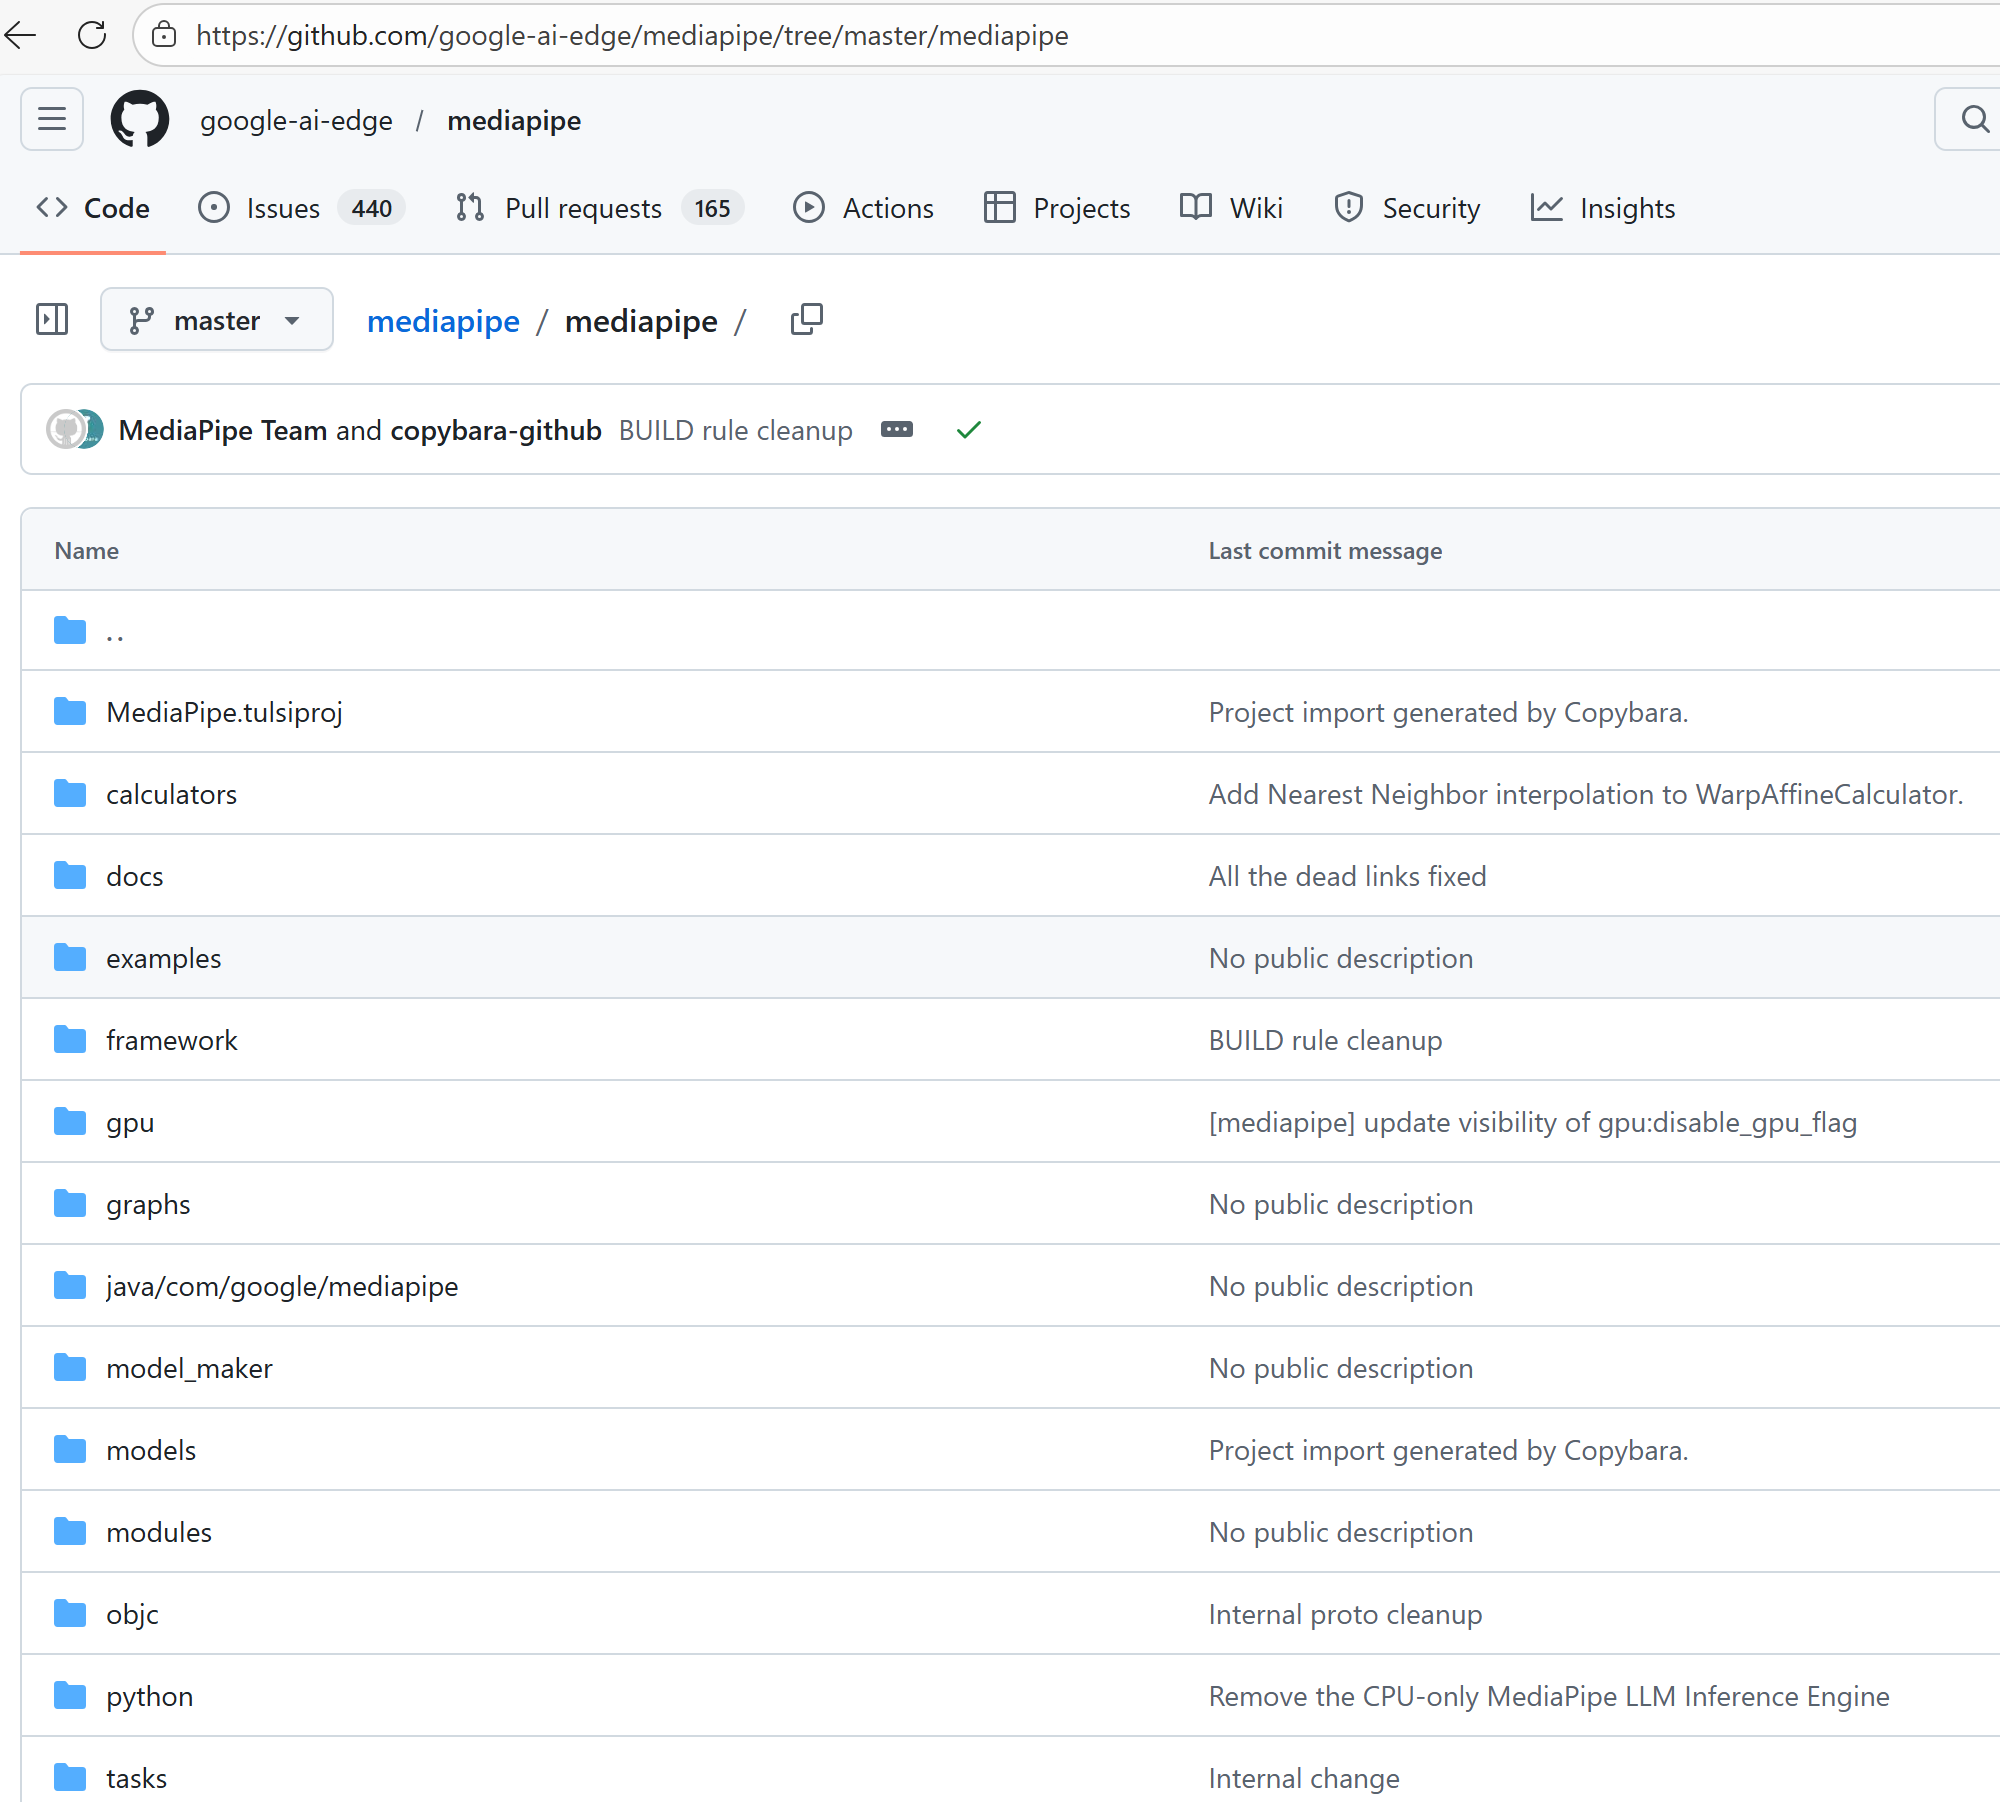


工程上是老版本老目录，新版本新目录。我安装的是mediapipe 0.10.32新版本，自然需要刷新代码，以满足新目录和新接口的要求，版本是什么时候调整目录和接口的还不得而知，也还没有细心去探究一下。老代码还遇到numpy_view()参数指示readonly问题，这都是不匹配导致的问题，也不再细述了。
## 代码移植新想法
参考官网的最新版本代码示例，这个应该是版本匹配的，调试工作量也会小一些，也许过不久使用AI自动code，就更加省心了。



# 修改样例代码

参考官网的代码示例，

https://github.com/google-ai-edge/mediapipe-samples/blob/main/examples/pose_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb  
从合入历史来看，上个月才更新了一次代码。


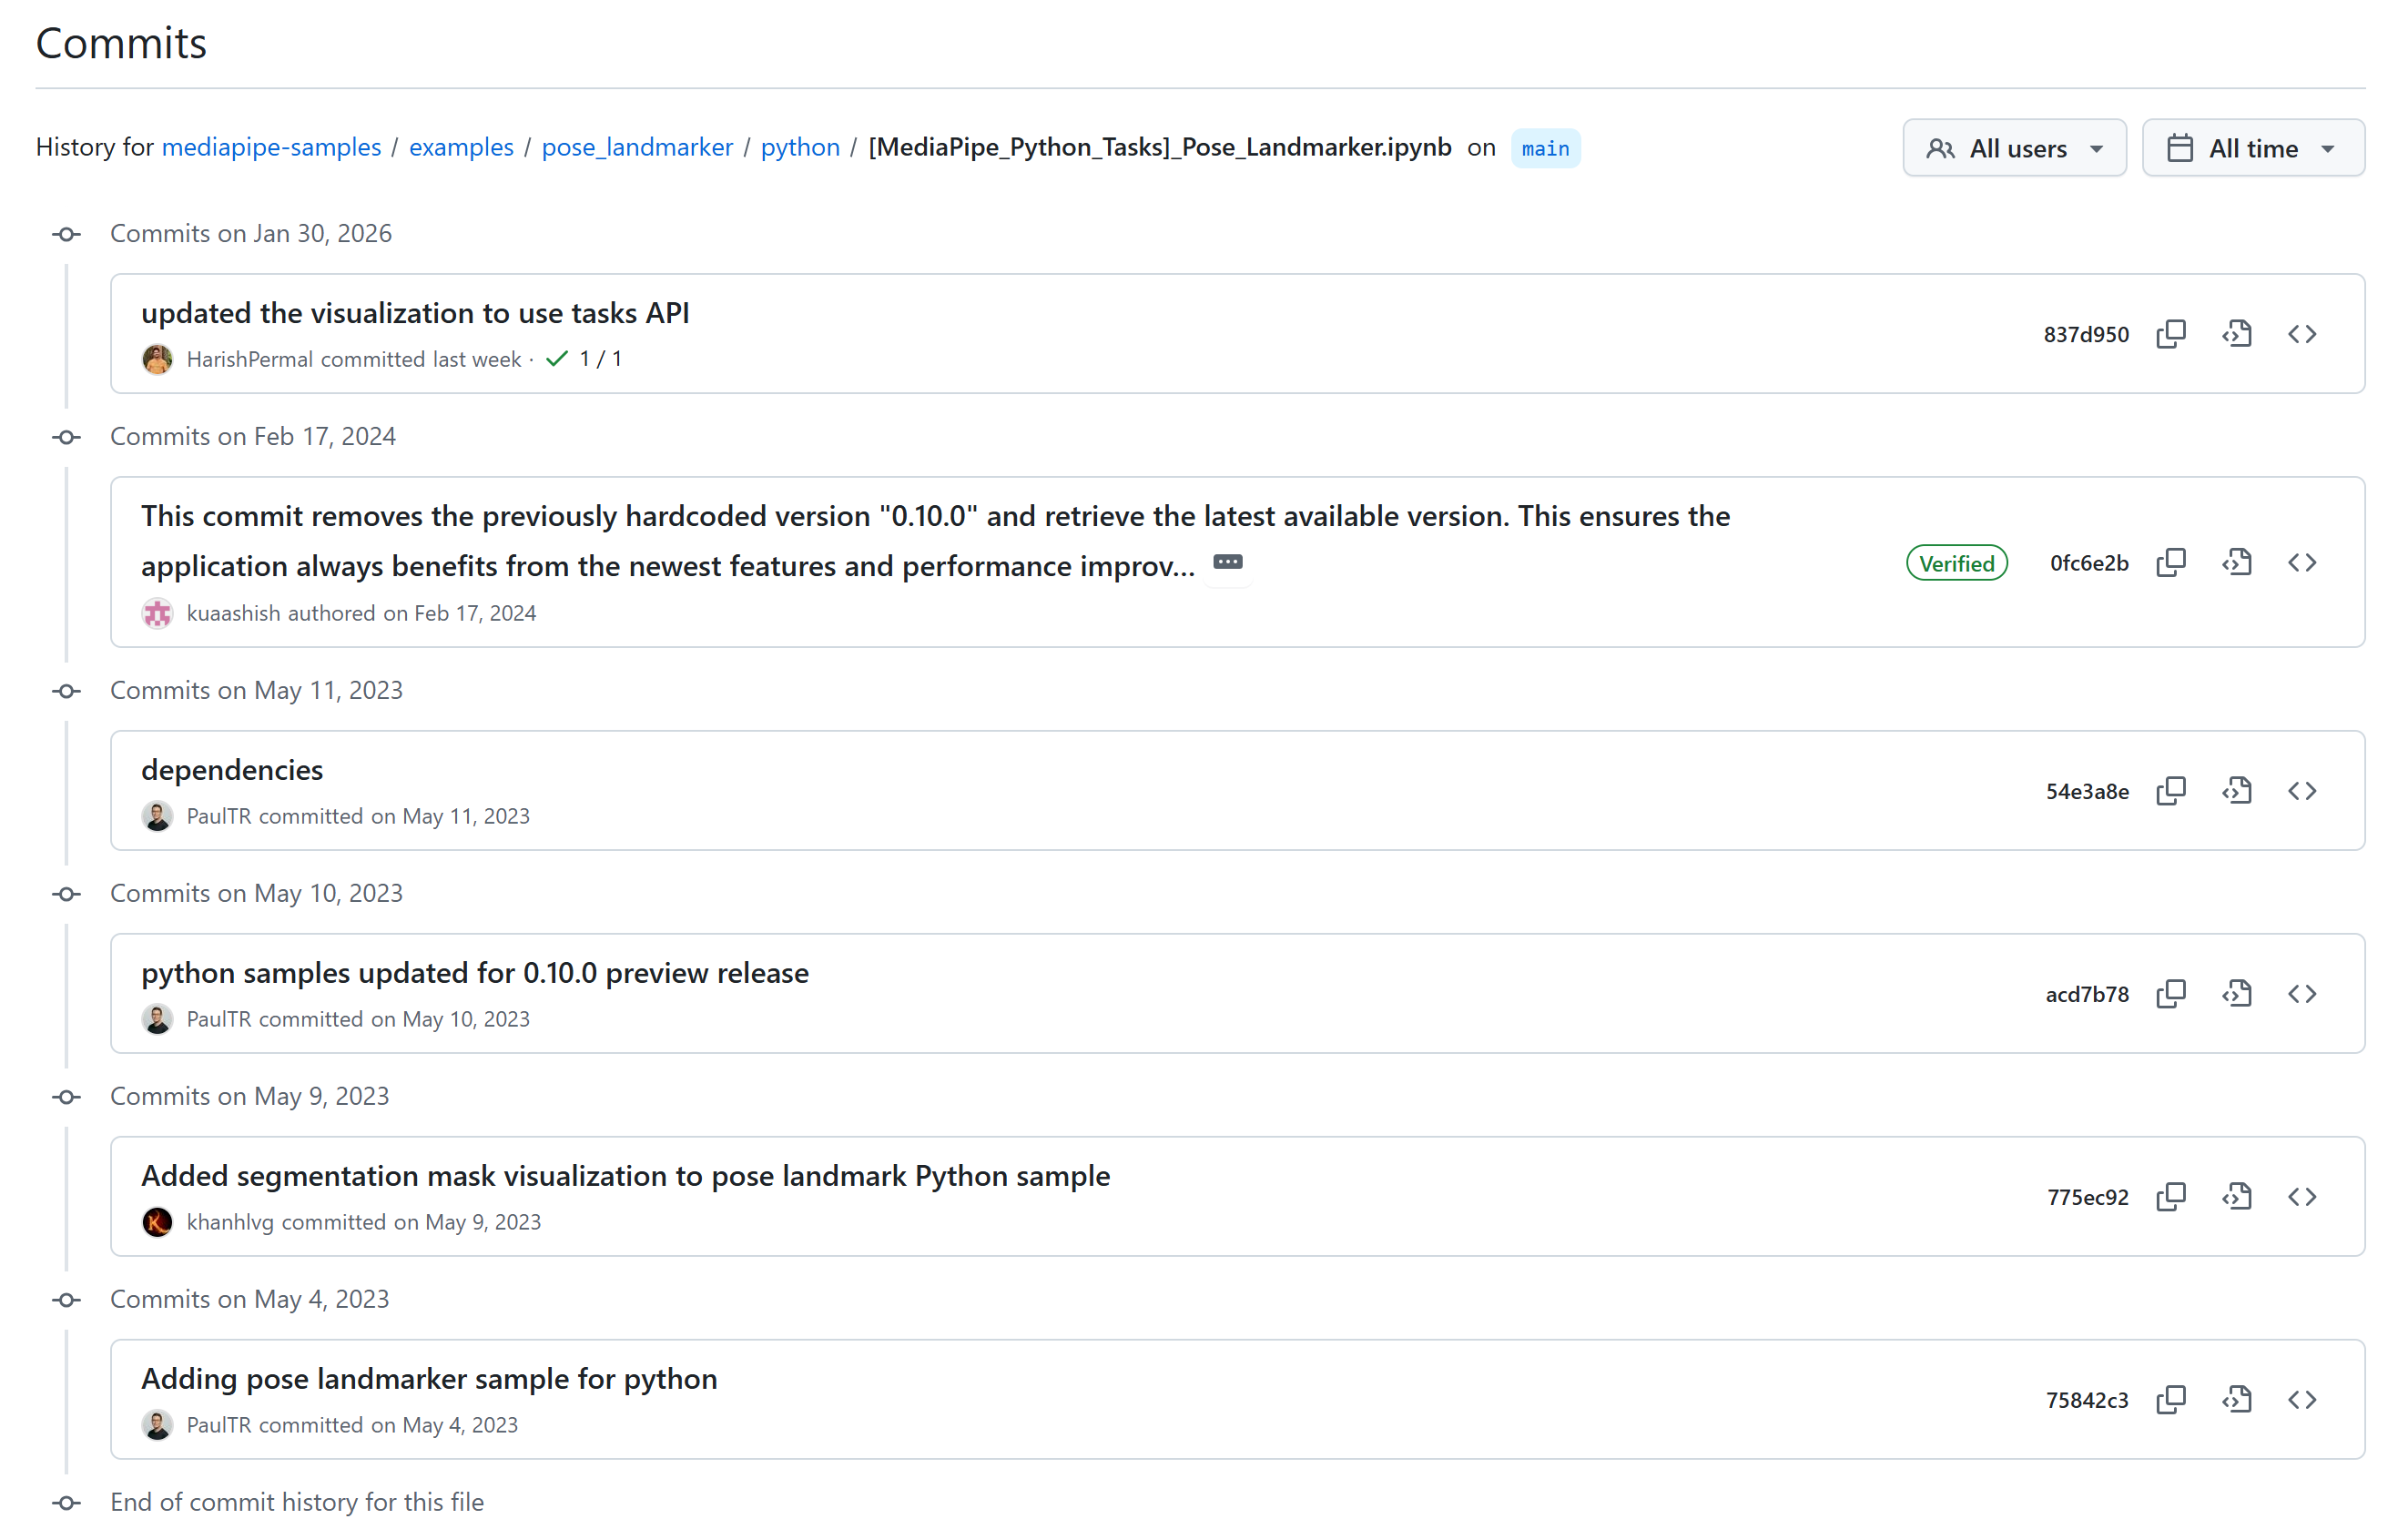

最新合入了visualization的特性，但是，jupyter notebook环境下不需要，所以，仅仅需要修改图像读取和图像显示接口。 

### 已经训练好的模型，下载到本地项目目录中
!wget -o pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

### cv2_imshow是需要修改的，本段代码的重点就是修改这个接口
import cv2  
from google.colab.patches import cv2_imshow  

img = cv2.imread("image.jpg")  
cv2_imshow(img)  

### 原始代码
import numpy as np  
from mediapipe.tasks.python.vision import drawing_utils  
from mediapipe.tasks.python.vision import drawing_styles  
from mediapipe.tasks.python import vision  


def draw_landmarks_on_image(rgb_image, detection_result):  
  pose_landmarks_list = detection_result.pose_landmarks  
  annotated_image = np.copy(rgb_image)  

  pose_landmark_style = drawing_styles.get_default_pose_landmarks_style()  
  pose_connection_style = drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2)  
  
  for pose_landmarks in pose_landmarks_list:  
    drawing_utils.draw_landmarks(  
        image=annotated_image,  
        landmark_list=pose_landmarks,  
        connections=vision.PoseLandmarksConnections.POSE_LANDMARKS,  
        landmark_drawing_spec=pose_landmark_style,  
        connection_drawing_spec=pose_connection_style)  

  return annotated_image  
  

### STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

### STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

### STEP 3: Load the input image.  ***文件名需要修改
image = mp.Image.create_from_file("image.jpg")

### STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

### STEP 5: Process the detection result. In this case, visualize it. ***cv2_imshow接口需要修改
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)  
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

# 修改后的代码

```
import cv2
import numpy as np  
from mediapipe.tasks.python.vision import drawing_utils  
from mediapipe.tasks.python.vision import drawing_styles  

def draw_landmarks_on_image(rgb_image, detection_result):  
    pose_landmarks_list = detection_result.pose_landmarks  
    annotated_image = np.copy(rgb_image)  

    pose_landmark_style = drawing_styles.get_default_pose_landmarks_style()  
    pose_connection_style = drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2)  
    #针对多实体，可以逐个添加关键点
    for pose_landmarks in pose_landmarks_list:  
        drawing_utils.draw_landmarks(  
            image=annotated_image,  
            landmark_list=pose_landmarks,  
            connections=vision.PoseLandmarksConnections.POSE_LANDMARKS,  
            landmark_drawing_spec=pose_landmark_style,  
            connection_drawing_spec=pose_connection_style)  

    return annotated_image  
  

# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("mypose640.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. 
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)  
bgr_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)  
cv2.imshow("mypose", bgr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()   
```

# 项目文件
把投篮照片放到项目目录中，说是项目，实际上就是一个文件夹下的两个文件，一个包含python代码的notebook文件，和一个从网络下载的pose_landmarker.task文件，这个是预训练模型文件，就像一个AI工具软件，不知道其原理，只知道喂一张图片就好。

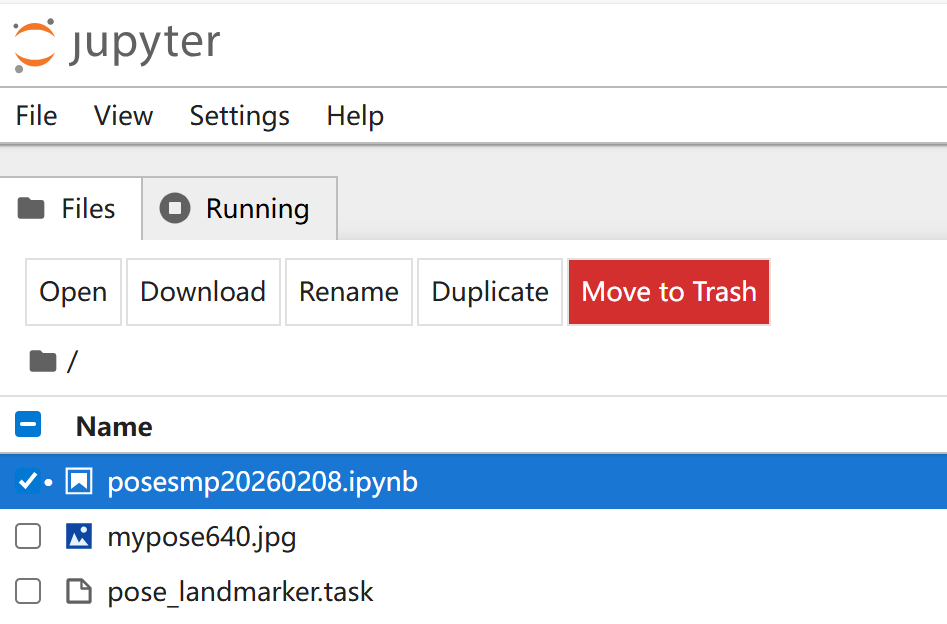

# 调整图片尺寸
因为第一次运行时，输出图像尺寸过大，屏幕都装不下。所以，使用电脑自带的图片工具，调整图像尺寸，把图像的像素控制在宽度640，这样，屏幕上可以完整显示打上关键点的图片。

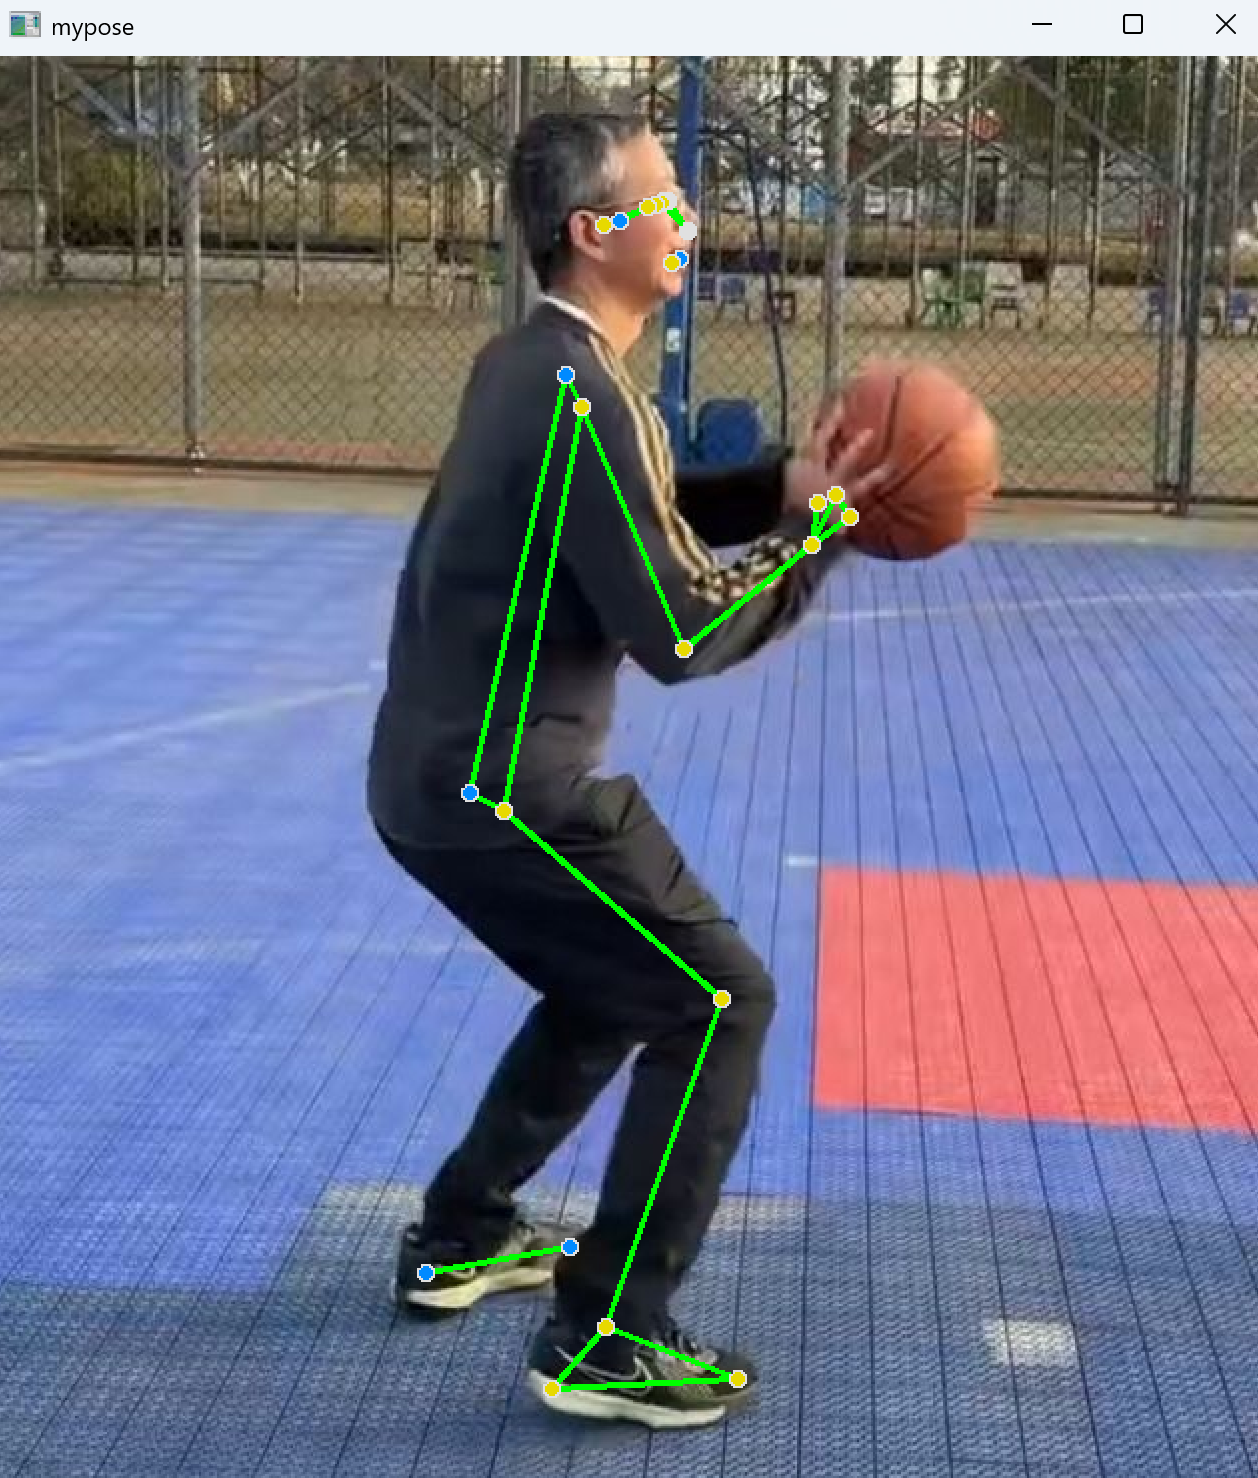

# 有bug的输出结果
高兴的是关键点和连线都有了，说明新版本的detect函数和draw_landmarks_on_image函数执行没有问题。郁闷的是有bug，左膝和左踝这两个关键点识别有遗漏，连线也缺了。我感觉要定位这个问题，比我前面的工作都更加困难。换一张照片，能够正确识别。

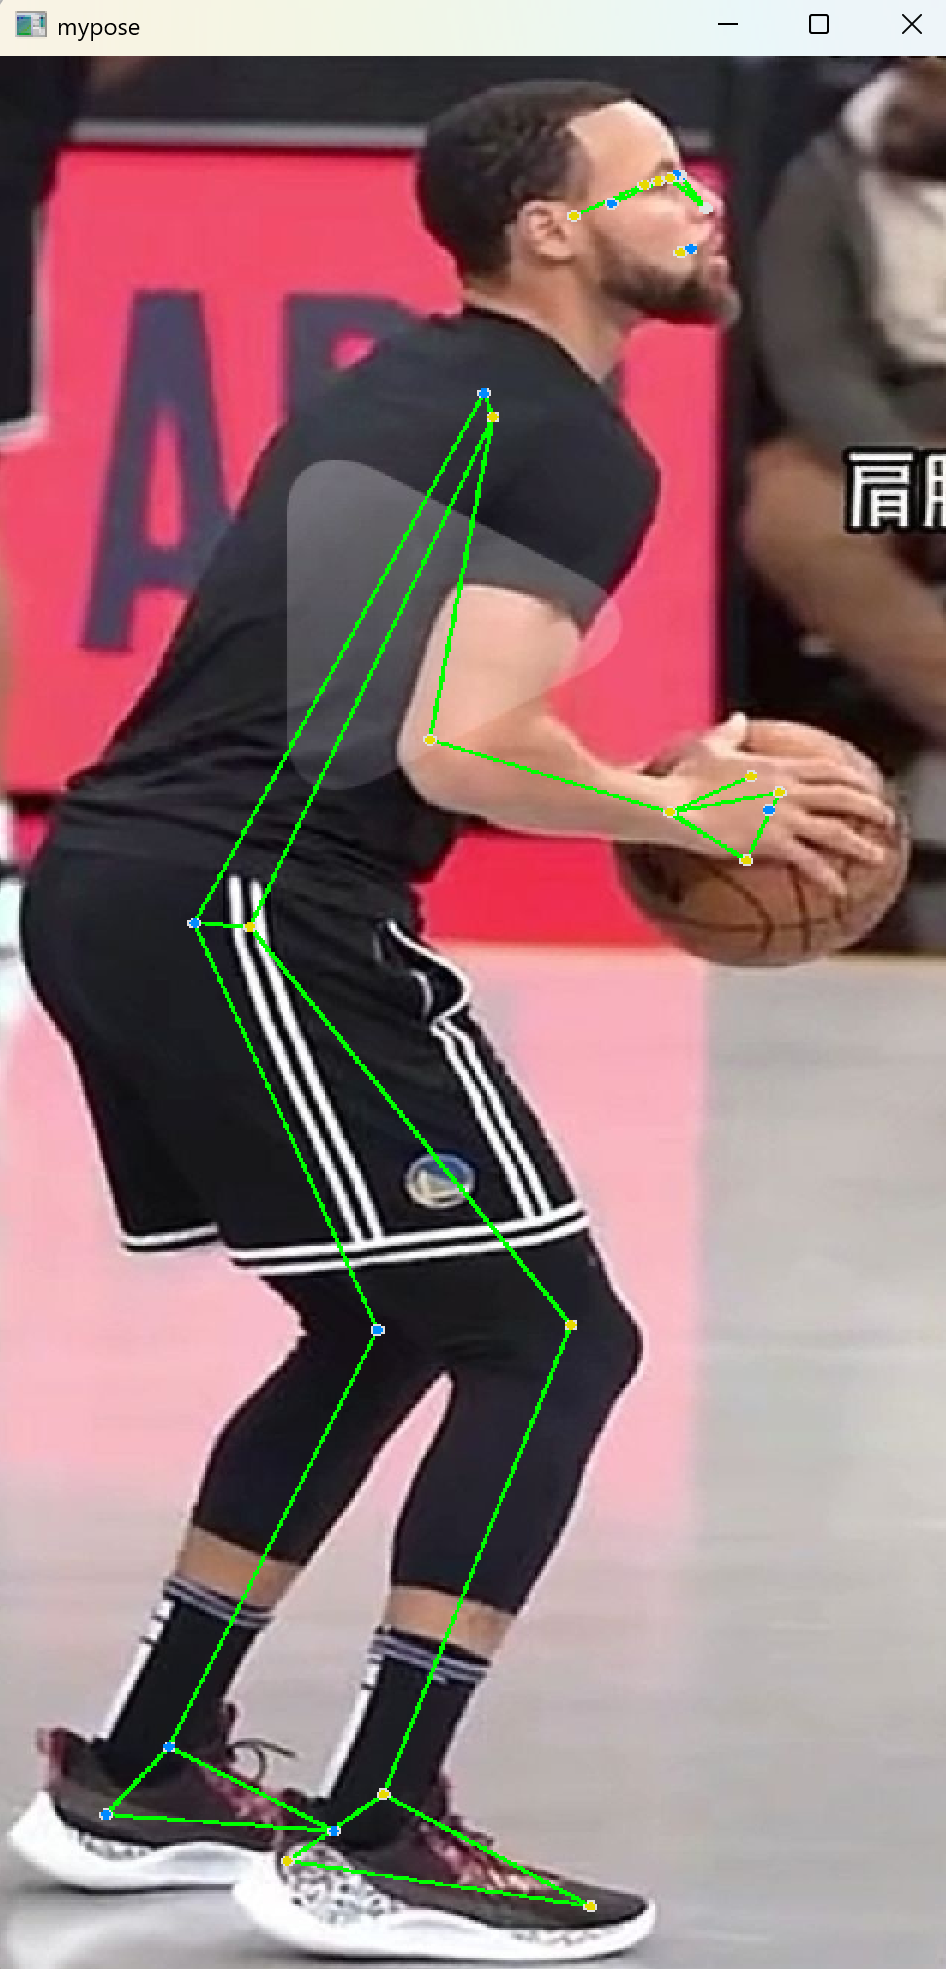

于是，文章先写到这里，下一步需要看看这个bug有什么解决思路，之前解决系统问题，可能要从底层代码，从汇编代码入手，现在应该要从接口或者参数上多调试一下。